    HealthLifeExpect  HousingDwellings  EuropeDummy
0           0.909774          0.024324          1.0
1           0.902256          0.051351          1.0
2           0.650376          0.181081          0.0
3           0.917293          0.005405          0.0
4           0.842105          0.254054          0.0
5           0.703008          0.645946          0.0
6           0.812030          0.018919          1.0
7           0.879699          0.013514          1.0
8           0.763158          0.189189          1.0
9           0.902256          0.013514          1.0
10          0.936090          0.013514          1.0
11          0.887218          0.005405          1.0
12          0.902256          0.013514          1.0
13          0.703008          0.127027          1.0
14          0.932331          0.000000          1.0
15          0.913534          0.027027          1.0
16          0.969925          0.018919          1.0
17          1.000000          0.172973          0.0
18          

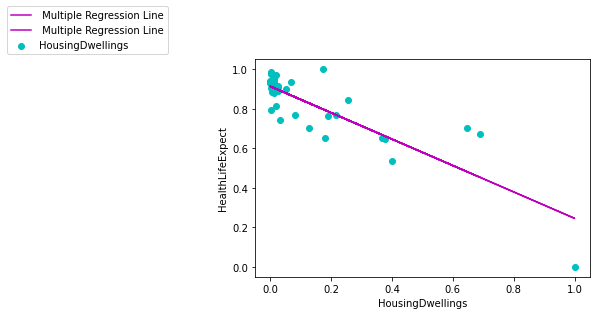

In [246]:
import pandas as pd
import researchpy as py
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

#####KEEP CATEGORY OF INTEREST IN POS 0

cat = ['HealthLifeExpect',
#        'HealthSelfReported',
      'HousingDwellings',
#        'JobsPersEarnings',
#       'CivicEngagemRuleMaking',
      'EuropeDummy']

def readcsv(name, cat_Type, *categories):
    df = pd.read_csv(name)


    df = df.replace(r'^\s*$', np.nan, regex=True)

    for category in categories:
        df[category] = df[category].astype(cat_Type)
        
    return df

df =readcsv('2020Data1.csv',float,cat)

def new_data(df,*categories):
    new_df = pd.DataFrame()
    new_df = new_df.fillna(0)
    for count,value in enumerate(categories):
        new_df[value] = df[value]
    new_df = new_df.dropna()
    return new_df
        

# new_df = df[[cat[0],cat[1],cat[2],cat[3]]]
new_df = new_data(df,cat)
new_df = (((new_df-new_df.min()))/(new_df.max()-new_df.min()))*1


# new_df = new_df.drop(new_df[new_df.HousingDwellings >0.5].index)
# new_df = new_df.drop([5,22,30])
new_df = new_df.reset_index()
new_df = new_df.drop(['index'],axis=1)
print(new_df)
y = np.array(new_df[cat[0]])
xs= []
for i in range(len(cat)-2):
    xs.append(np.array(new_df[cat[i+1]]))
X = np.array(new_df[cat[1:len(cat)-1]])


x = sm.add_constant(X)

models = sm.OLS(y,x)
results = models.fit()
print(results.summary())
print(results.rsquared)
print(results.rsquared_adj)
print(results.params)

y_res = results.resid

pred_x = results.fittedvalues
pred_y = results.predict(x)
# corr = new_df.corr()
# fig, ax = plt.subplots(figsize=(10,10))    
# sns.heatmap(corr,annot=True)
# plt.show()

p=results.params
# x=np.arange(0,100)


fig,ax = plt.subplots()
ax.plot(x,(p[0]+p[1]*x), color = 'm',label = ' Multiple Regression Line')
# ax.plot(x,p[0],color ='#03fc6b', label = 'Regression const')
# ax.plot(x,p[1]*x,color= 'c')
# ax.plot(x,p[2]*x,color= 'y')
# ax.plot(x,p[3]*x,color ='k')
# ax.plot(x,p[4]*x,color ='g')
# ax.set_size_inches(20, 15)
# ax.set_autoscale_on
# ax.set_xlim(40)
ax.scatter(xs[0],y, color = 'c', label = cat[1])
# ax.scatter(xs[1],y, color = 'y', label = cat[2])
# ax.scatter(xs[2],y, color = 'k', label = cat[3])
# ax.scatter(xs[3],y, color = 'g', label = cat[4])
plt.ylabel(cat[0])
plt.xlabel(cat[1])
# ax.axis('equal')
leg = ax.legend(loc='lower center',bbox_to_anchor=(-0.5,1));


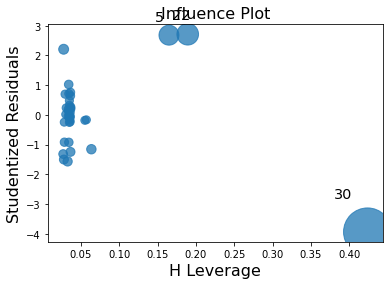

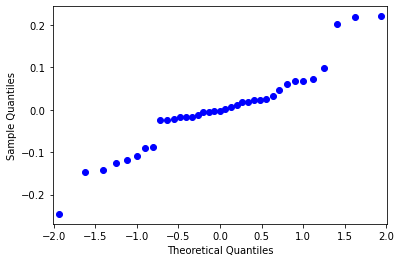

In [247]:
fig = sm.graphics.influence_plot(results,alpha = 0.01)

plt.show()
fig = sm.graphics.qqplot(y_res)
plt.show()

37
37


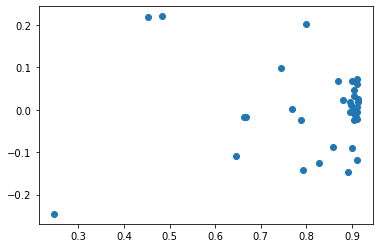

LeveneResult(statistic=0.16562489036433284, pvalue=0.6852370787113005)


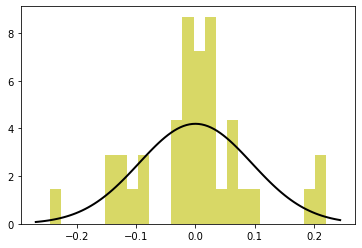

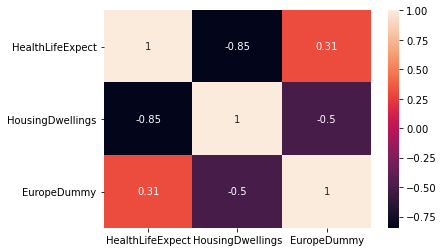

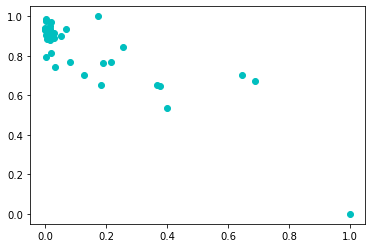

In [248]:
print(len(x))
print(len(y))
plt.scatter(pred_x,y_res)
plt.show()
print(stats.levene(y,xs[0]))

mu,std = stats.norm.fit(y_res)

plt.hist(y_res, bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
plt.show()

# plt.scatter(x3,y,x1,x2)
plt.show() 

corr = new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# plt.scatter(pred_,y_res)
plt.show()

# sns.lmplot(x='CommunitySupport',y='LifeSatisfaction',hue = 'Community Support')
# fig = plt.figure()
# ax1 = fig.add_subplot(111)

plt.scatter(xs[0],y,color = 'c')
plt.show()
# plt.scatter(xs[1],y,color = 'y')
plt.show()
# plt.scatter(xs[2],y, color = 'k')
# plt.show()
# plt.scatter(xs[3],y, color = 'g')
# plt.show()

# plt.s